# Customer Churn Analysis – Telco Dataset 📊

**Project Type:** Personal Project  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn, Jupyter Notebook  
**Goal:** Identify key drivers of customer churn and build a churn prediction model.

---

## 🔍 Problem Statement

A telecom company is facing high customer churn. The goal is to:

- Analyze customer behavior patterns  
- Identify features driving churn  
- Build a logistic regression model to predict churn risk

---

## 📂 Dataset Info

- Rows: 7043 customer records  
- Features: 21 (demographics, service types, usage, billing)  
- Target: `Churn` (Yes/No)

---

## 📈 Key Steps

- Imported and cleaned data (`TotalCharges`, missing rows, `customerID`)  
- Encoded categorical variables (binary & one-hot encoding)  
- Trained logistic regression model with 78.75% accuracy (after scaling)  
- Identified top churn drivers using model coefficients  

---

## 💡 Key Insights

- **Tenure**: Newer customers churn more → improve early onboarding  
- **InternetService: Fiber Optic** users are more likely to churn → explore pricing/service issues  
- **High TotalCharges** linked to churn → offer value-based retention strategies  

---

## ✅ Outcome

A lightweight logistic regression model was built with **~79% accuracy**.  
This analysis helps the company **prioritize retention efforts** and reduce churn.

---

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Preview the first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Telco-Customer-Churn.csv'

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names and data types
print("\nColumn info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Shape of dataset: (7043, 21)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

In [4]:
# Convert TotalCharges to numeric (coerce errors into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN
print("Missing TotalCharges after conversion:", df['TotalCharges'].isnull().sum())

# Remove rows with missing TotalCharges
df = df[df['TotalCharges'].notnull()]

# Drop customerID column (not useful for ML)
df.drop('customerID', axis=1, inplace=True)

# Confirm changes
print("\nUpdated shape:", df.shape)

Missing TotalCharges after conversion: 11

Updated shape: (7032, 20)


In [5]:
# First, map binary Yes/No columns to 1/0
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# Now one-hot encode the remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

# Confirm the new shape and column names
print("Updated shape after encoding:", df.shape)
print("\nSample columns after encoding:\n", df.columns[:10])

Updated shape after encoding: (7032, 31)

Sample columns after encoding:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


C:\Users\kanak\AppData\Local\Temp\ipykernel_7600\1533918458.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target label (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 78.68%


C:\Users\kanak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data, then runs logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict again
y_pred_scaled = pipeline.predict(X_test)

# Accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled Logistic Regression Accuracy: {accuracy_scaled * 100:.2f}%")

Scaled Logistic Regression Accuracy: 78.75%


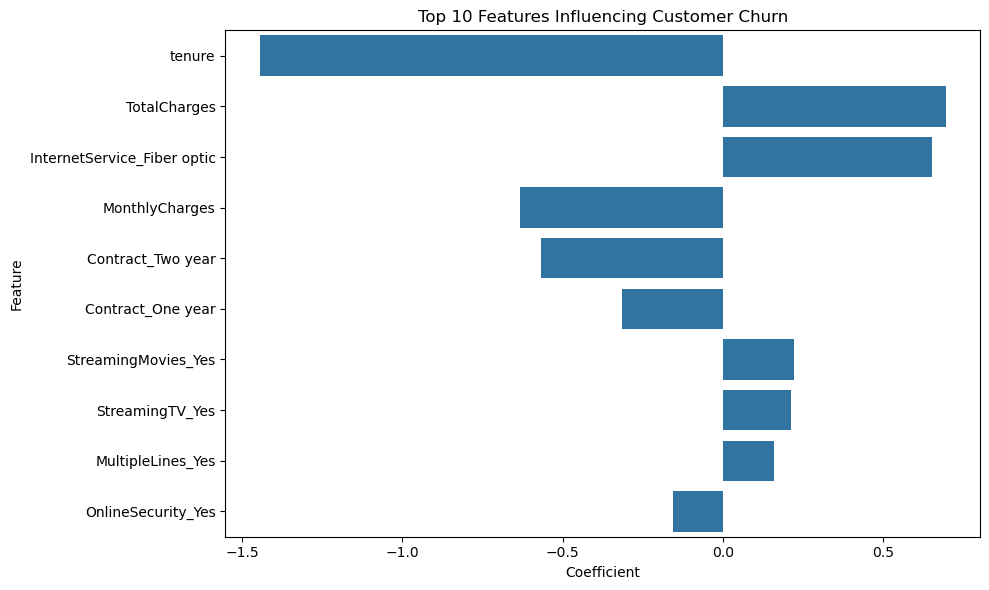

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and model coefficients
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
features = X.columns

# Combine into a dataframe
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute impact
coef_df['AbsCoeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('AbsCoeff', ascending=False).drop('AbsCoeff', axis=1)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Features Influencing Customer Churn")
plt.tight_layout()
plt.show()